# Abstract

The purpose of this notebook is to categorize the countries using socio-economic and health factors that determine the overall development of the country. Using Kmeans Clustering, we will decide which countries fall into the categories 'Need Help' and 'Not Help Needed'. We will implement Kmeans in python and define the number of clusters required and visualize them using two attributes 'Exports' and 'Income'.

# K-means

* Common clustering technique, helps to solve many problems efficiently.
* One of the simplest and popular unsupervised machine learning algorithms.
* Unsupervised algorithms means that our datasets using only input vectors(X) without referring to labelled, outcomes(Y). -a common technique for statistical data analysis 

## The objective of K-means is simple: 

Group similar data points together and discover underlying patterns. To achieve this objective, K-means looks for a fixed number (k) of clusters in a dataset. In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster,The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

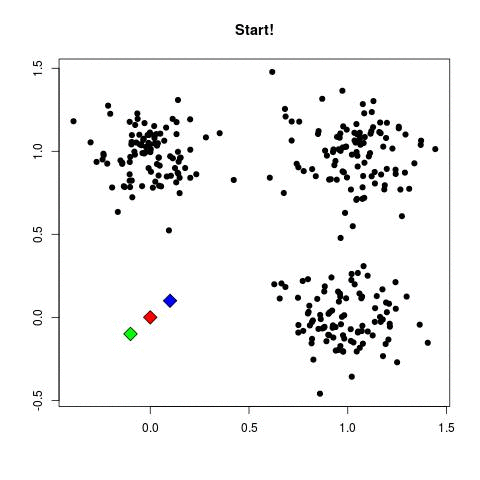

# Problem Description


In this notebook, we will look at K-means algorithm which is a type of unsupervised learning method. This algorithm will be applied on the country dataset. This dataset has 167 rows, 10 different columns.

Columns:

* country: Name of the country
* child_mort: Death of children under 5 years of age per 1000 live births
* exports: Exports of goods and services per capita. Given as %age of the GDP per capita
* health: Total health spending per capita. Given as %age of GDP per capita
* imports: Imports of goods and services per capita. Given as %age of the GDP per capita
* income: Net income per person
* inflation: The measurement of the annual growth rate of the Total GDP
* life_expec: The average number of years a new born child would live if the current mortality patterns are to remain the same
* total fer: The number of children that would be born to each woman if the current age-fertility rates remain the same
* gdpp: The GDP per capita. Calculated as the Total GDP divided by the total population

# Connection to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [2]:
# Import necessary libraries
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns

# Loading Dataset

In [3]:
# Reading Dataset
path = "/content/drive/MyDrive/DS/KMeans-Clustering/Data/Country-data.csv"
country_df = pd.read_csv(path)
country_df.head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
country_df.shape

(167, 10)

# Exploratory Data Analysis

**HeatMap**

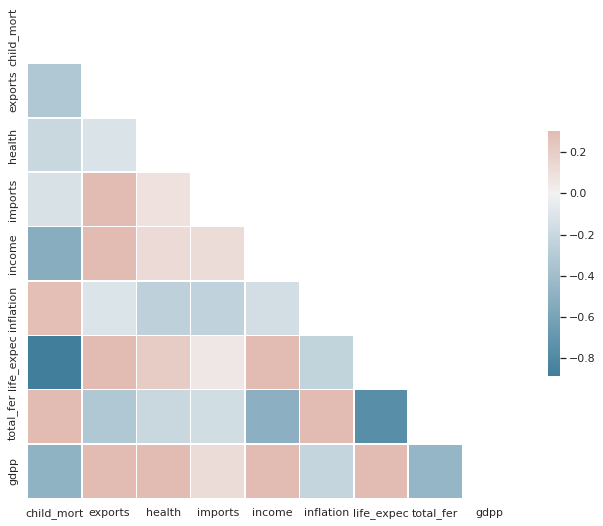

In [5]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = country_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**DisPlot**

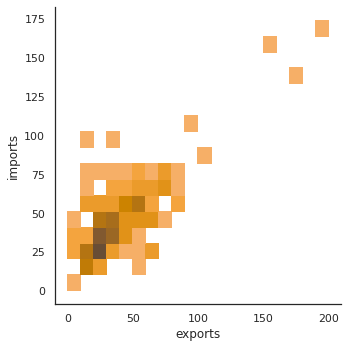

In [6]:
sns.displot(data=country_df, x=country_df['exports'], y=country_df['imports'], color='orange')

**Density Plot (KDE)**

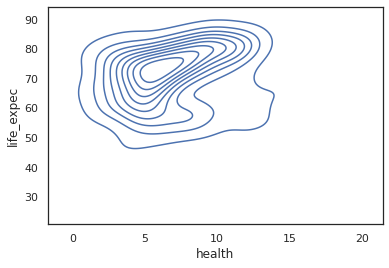

In [7]:
sns.kdeplot(data=country_df, x=country_df['health'], y=country_df['life_expec'])

**Joint Plot**

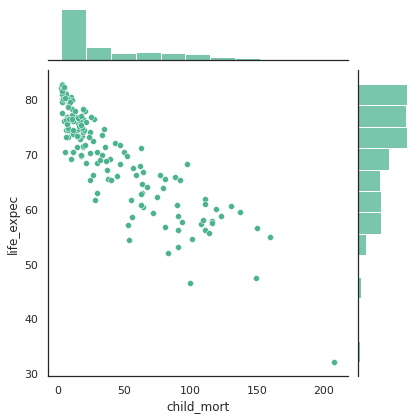

In [8]:
sns.jointplot(data=country_df, x=country_df['child_mort'], y=country_df['life_expec'], color="#4CB391")

**Scatter Plot**

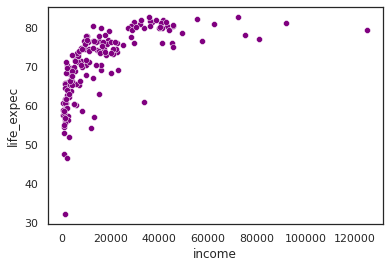

In [9]:
sns.scatterplot(data=country_df, x=country_df['income'], y=country_df['life_expec'], color='purple')

In [10]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [11]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [12]:
cdf = country_df.loc[:, ['exports', 'income']]
cdf.head(2)

,exports,income
0,10.0,1610
1,28.0,9930


In [13]:
X = cdf.values
X[:5]

array([[1.00e+01, 1.61e+03],
       [2.80e+01, 9.93e+03],
       [3.84e+01, 1.29e+04],
       [6.23e+01, 5.90e+03],
       [4.55e+01, 1.91e+04]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


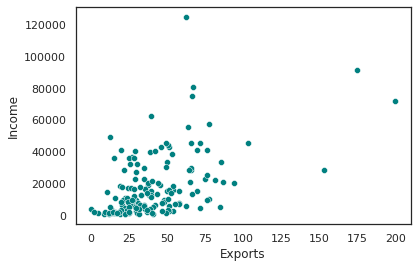

In [14]:
sns.scatterplot(X[:,0], X[:, 1], color='teal')

plt.xlabel('Exports')
plt.ylabel('Income')
plt.show()

# Data Check

In [15]:
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# Data Description

This function gives us the categoric, numeric and categorical but cardinal column names.

Note: Categorical variables with numerical appearance are also included in categorical variables.

    Parameters
    ------
        dataframe: dataframe
                   The dataframe from which variable names are to be retrieved
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variable

    Returns
    ------
        cat_cols: list
                  Categorical variable list
        num_cols: list
                  Numerical variable list
        cat_but_car: list
                     Categorical view cardinal variable list

    
    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables num_but_cat is inside cat_cols.
        The sum of the 3 returned lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables

In [16]:
# Determining categoric, cardinal and numeric columns according to given threshold.
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [17]:
cat_cols, num_cols, cat_but_car = grab_col_names(country_df)

Observations: 167
Variables: 10
cat_cols: 0
num_cols: 9
cat_but_car: 1
num_but_cat: 0


In [18]:
cat_but_car , num_cols

(['country'],
 ['child_mort',
  'exports',
  'health',
  'imports',
  'income',
  'inflation',
  'life_expec',
  'total_fer',
  'gdpp'])

## Data Processing

### Checking Outliers

In [19]:
# Determining low and up limit according to given quantile values.
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

low_limit, up_limit = outlier_thresholds(country_df, num_cols)

In [20]:
# Outliers check.
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
    
check_outlier(country_df,num_cols)

True

**Checking the columns for outliers.**

In [21]:
# Changing outlier variables given threshold values.
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    print(col, "\t", check_outlier(country_df, col))
    if check_outlier(country_df, col):
        replace_with_thresholds(country_df, col)
        
for i in num_cols:
    print(i, "\t", check_outlier(country_df, i))

child_mort 	 False
exports 	 True
health 	 False
imports 	 False
income 	 True
inflation 	 True
life_expec 	 False
total_fer 	 False
gdpp 	 False
child_mort 	 False
exports 	 False
health 	 False
imports 	 False
income 	 False
inflation 	 False
life_expec 	 False
total_fer 	 False
gdpp 	 False


Here, we can confirm that there are outliers present only in the 'exports', 'income' and 'inflation' columns.

According to the plots seen above, we can conclude that there a very few outliers in these columns as we see only a few data points away from the cluster.

## Missing Values

In [22]:
# Querying missing values.
country_df.isnull().any()

country       False
child_mort    False
exports       False
health        False
imports       False
income        False
inflation     False
life_expec    False
total_fer     False
gdpp          False
dtype: bool

There are no missing values in the dataset.

## K-Means Clustering Method

**How the K-means algorithm works?**

To process the learning data, the K-means algorithm in data mining starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids.

1. Cluster assignment
The algorithm goes through each of the data points and depending on which cluster is closer, It assigns the data points to one of the cluster centroids.

2. Updation centroid
K-means moves the centroids to the average of the points in a cluster. In other words, the algorithm calculates the average of all the points in a cluster and moves the centroid to that average location. This process is repeated until there is no change in the clusters. K is chosen randomly or by giving specific initial starting points by the us.

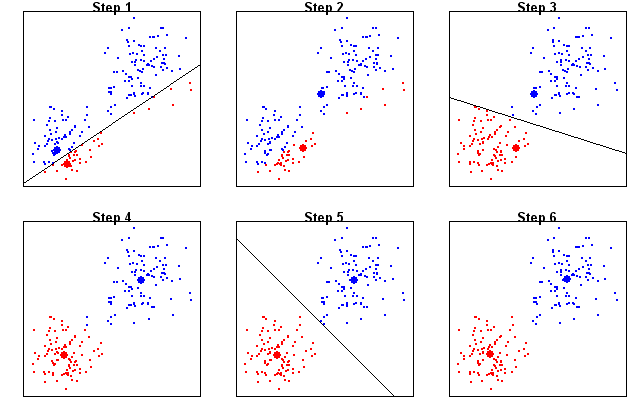


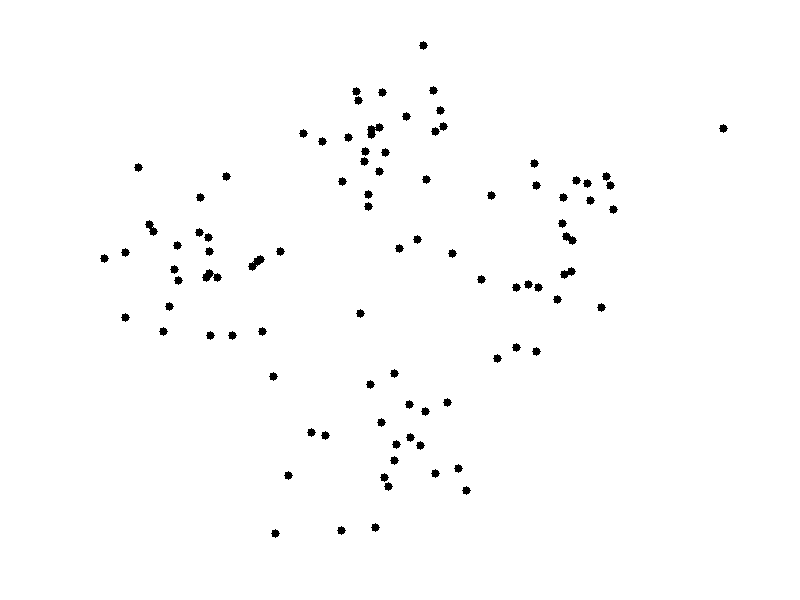

**Cluster Quality**

Our goal here is not just to make many clusters but to make the most meaningful clusters. We can measure the quality of clusters using a metric called Interia.

**Inertia** is the average distortion of the clusters. \n",
Distortion is calculated at the cluster level. For each cluster, it calculates the sum of squared \"error\" where error is considered as the distance of a every datapoint from its cluster centroid.
Think about this, if we have 500 data-points, the model can create 500 clusters, thus making distortion zero and the \"best quality\". Measuring the performance just based on distortion is not good enough. Therefore, picking 'k' is a very important step in building a clustering model.

**How do we choose 'k'?**

A fundamental step for any clustering algorithm is to determine the optimal number of clusters (k) into which the data may be clustered.



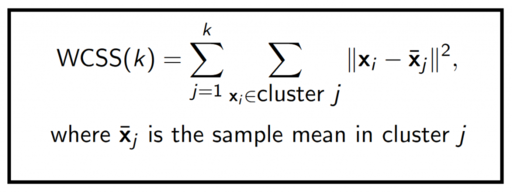

**WCSS** is an ideal way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares (WCSS). WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids. The objective is to minimise this value.



### Calculating WCSS

WCSS - Within-Cluster Sum of Square

Calculating the distance between centroid and each data point by defining the calculate_cost function, giving three inputs (data points, centroids and cluster k) to the function.

In [23]:
def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
      sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 + (centroids[int(cluster[i]), 1]-val[1])**2)
  
  return sum

Finding the **total number** of data points in the dataset.

In [24]:
len(X)

167

**Algorithm**

The main goal of this section is to write out the algorithm for K-Means Clustering without the use of external ML packages and to understand each step that is performed.

**Objective**

Running this code on our dataset will allow us to understand how the model iteratively clusters.



Defining **Kmeans** function to form clusters k based on the data points present in the dataset.

In [25]:
def kmeans(X, k):
  
  diff = 1
  cluster = np.zeros(X.shape[0])

  # select k random centroids
  random_indices = np.random.choice(len(X), size=k, replace=False)
  centroids = X[random_indices, :]

  while diff:

    # for each observation
    for i, row in enumerate(X):

      mn_dist = float('inf')
      # dist of the point from all centroids
      for idx, centroid in enumerate(centroids):
        d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)

        # store closest centroid 
        if mn_dist > d:
          mn_dist = d
          cluster[i] = idx

    new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values

    # if centroids are same then leave
    if np.count_nonzero(centroids-new_centroids) == 0:
      diff = 0
    else:
      centroids = new_centroids
  return centroids, cluster 

# Find K value

## Elbow Method

The Elbow method runs k-means clustering on the dataset for a range of values for k (say from 1-10) and records the avearage distortion for each of these k values. We expect this graph to produce a long-tail (as we increase the clusters, the distortions will reduce) and the goal is to identify the \"elbow\" which optimizes the number of clusters without overfitting.

Now let's check the number of clusters that would be needed for this dataset using the elbow method.

In [26]:
cost_list = []

for k in range(1, 10):
  
  centroids, cluster = kmeans(X, k)
  
  # WCSS (Within cluster sum of square)
  cost = calculate_cost(X, centroids, cluster)
  cost_list.append(cost)

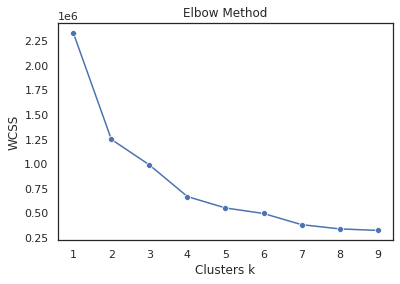

In [27]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.title("Elbow Method")
plt.xlabel('Clusters k')
plt.ylabel('WCSS')
plt.show()

In the plot, we see that the **K=4 or K=5** is the optimal value from the elbow method.<br>
WCSS doesn't reduce much after k=4, so make 4 clusters.

### K = 2

In [28]:
k = 2
centroids, cluster = kmeans(X, k)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


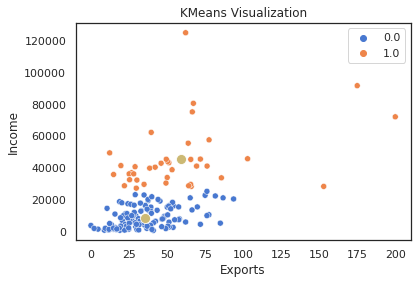

In [29]:
sns.scatterplot(x=X[:,0], y=X[:, 1], hue=cluster, palette="muted")
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')

plt.title("KMeans Visualization")
plt.xlabel('Exports')
plt.ylabel('Income')
plt.show()

### K = 3

In [30]:
k = 3
centroids, cluster = kmeans(X, k)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


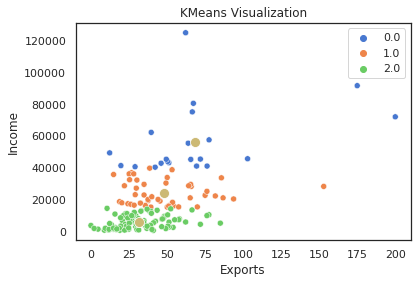

In [31]:
sns.scatterplot(x=X[:,0], y=X[:, 1], hue=cluster, palette="muted")
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')

plt.title("KMeans Visualization")
plt.xlabel('Exports')
plt.ylabel('Income')
plt.show()

### K = 4

In [32]:
k = 4
centroids, cluster = kmeans(X, k)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


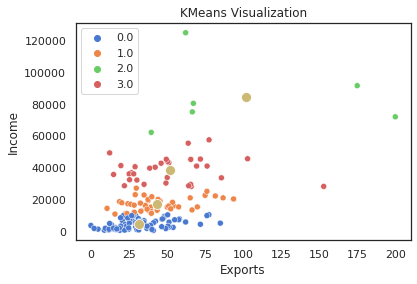

In [33]:
sns.scatterplot(x=X[:,0], y=X[:, 1], hue=cluster, palette="muted")
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')

plt.title("KMeans Visualization")
plt.xlabel('Exports')
plt.ylabel('Income')
plt.show()

### K = 5

In [34]:
k = 5
centroids, cluster = kmeans(X, k)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


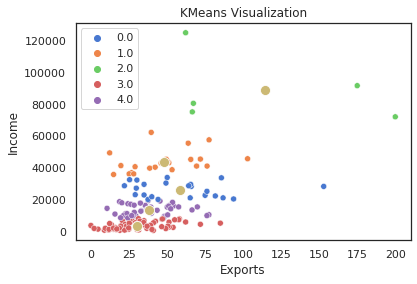

In [35]:
sns.scatterplot(x=X[:,0], y=X[:, 1], hue=cluster, palette="muted")
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')

plt.title("KMeans Visualization")
plt.xlabel('Exports')
plt.ylabel('Income')
plt.show()

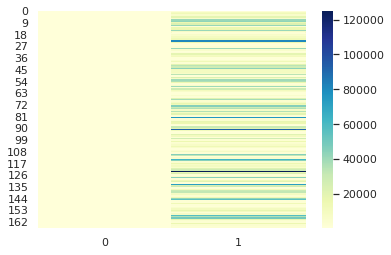

In [36]:
sns.heatmap(X, cmap="YlGnBu")

# Conclusion

Deciding what country from the selected cluster will receive financial help can be made using others parameters not included in this analysis. But, if we list the top 10 countries with the highest Child Mortality from our cluster number 2, it's a good indication of who deserves more this financial help.

# References

* [K-means Clustering From Scratch](https://medium.com/nerd-for-tech/k-means-python-implementation-from-scratch-8400f30b8e5c)
* [Country Dataset](https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data)
* [K-means Tutorial In Python](https://www.kaggle.com/rishidamarla/kmeans-clustering-machine-learning-tutorial)
* [StatQuest K-means Clustering](https://www.youtube.com/watch?v=4b5d3muPQmA)

# License

Copyright 2021 Vachana Satish Belgavi

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.